In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0  as tensure is 0 and no total charges are recorded

In [11]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum().sum()

np.int64(0)

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df["customerID"].duplicated().sum()

np.int64(0)

In [18]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [17]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

# Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand


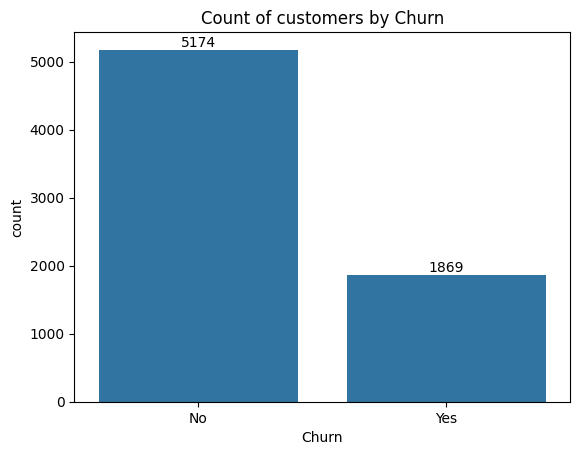

In [33]:
ax = sns.countplot(x= 'Churn', data= df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()


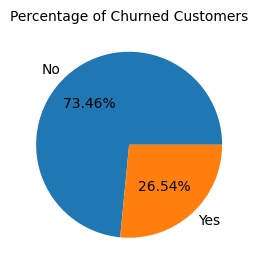

In [34]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index,autopct ="%1.2f%% ")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

# From the given pie chart we can conduct that 26.54% of our customers have churned out# not let's explore the reason behind it


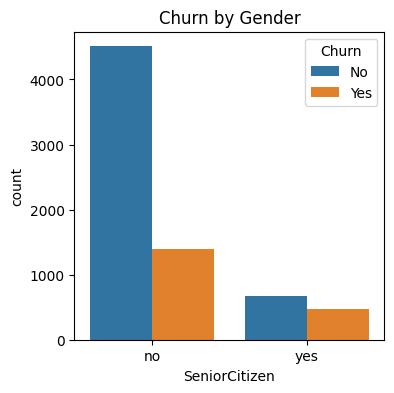

In [43]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen",data = df,hue = "Churn")
plt.title("Churn by Gender")
plt.show()

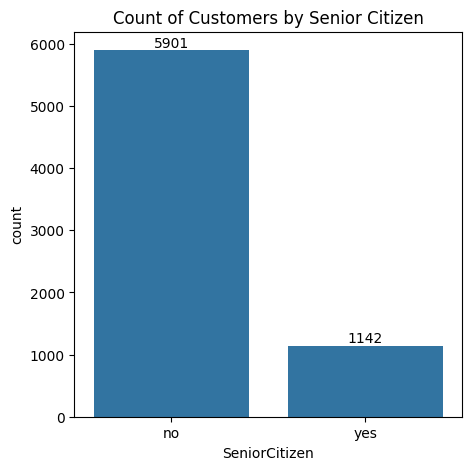

In [48]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

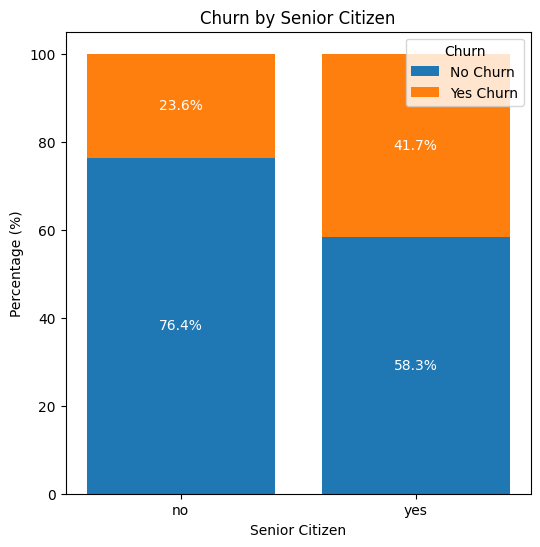

In [65]:
proportions = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = proportions.div(proportions.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
bar_labels = percentages.columns  # Dynamically fetch column names
bar1 = ax.bar(percentages.index, percentages[bar_labels[0]], label=f"{bar_labels[0]} Churn")
bar2 = ax.bar(percentages.index, percentages[bar_labels[1]], bottom=percentages[bar_labels[0]], label=f"{bar_labels[1]} Churn")

# Annotate percentages
for idx in percentages.index:
    for col, bar in zip(percentages.columns, [bar1, bar2]):
        value = percentages.loc[idx, col]
        y_pos = value / 2 if col == bar_labels[0] else percentages[bar_labels[0]].loc[idx] + value / 2
        ax.text(idx, y_pos, f'{value:.1f}%', ha='center', va='center', color='white')

# Customize the plot
ax.set_title("Churn by Senior Citizen")
ax.set_xlabel("Senior Citizen")
ax.set_ylabel("Percentage (%)")
ax.legend(title="Churn")

plt.show()

# Comparative a greater percentage of people in senior citizen category have churned

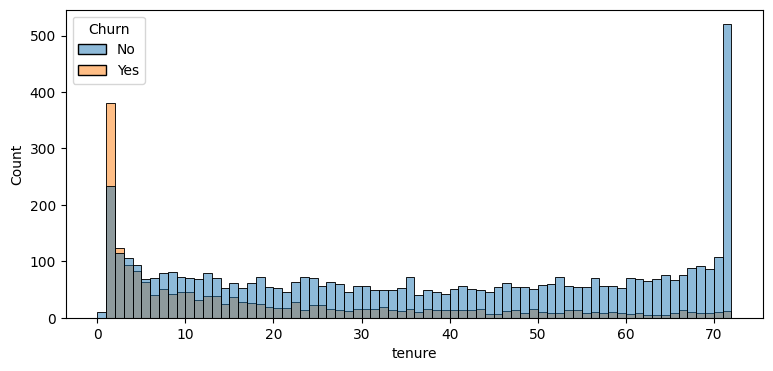

In [70]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue ='Churn')
plt.show()

# People who have used our services for long time have stayed and people who have used our services 1 or 2 months have churned 

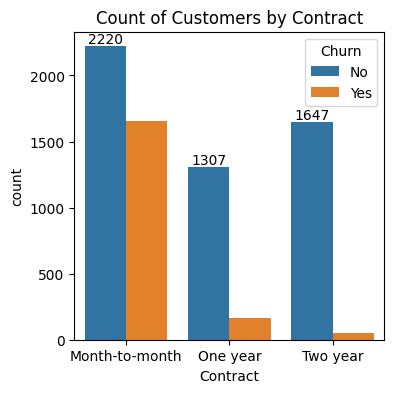

In [72]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract",data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

In [ ]:
# People who have moth to month contract are likely to churn then from those who have 1 or 2 years or contract

In [73]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

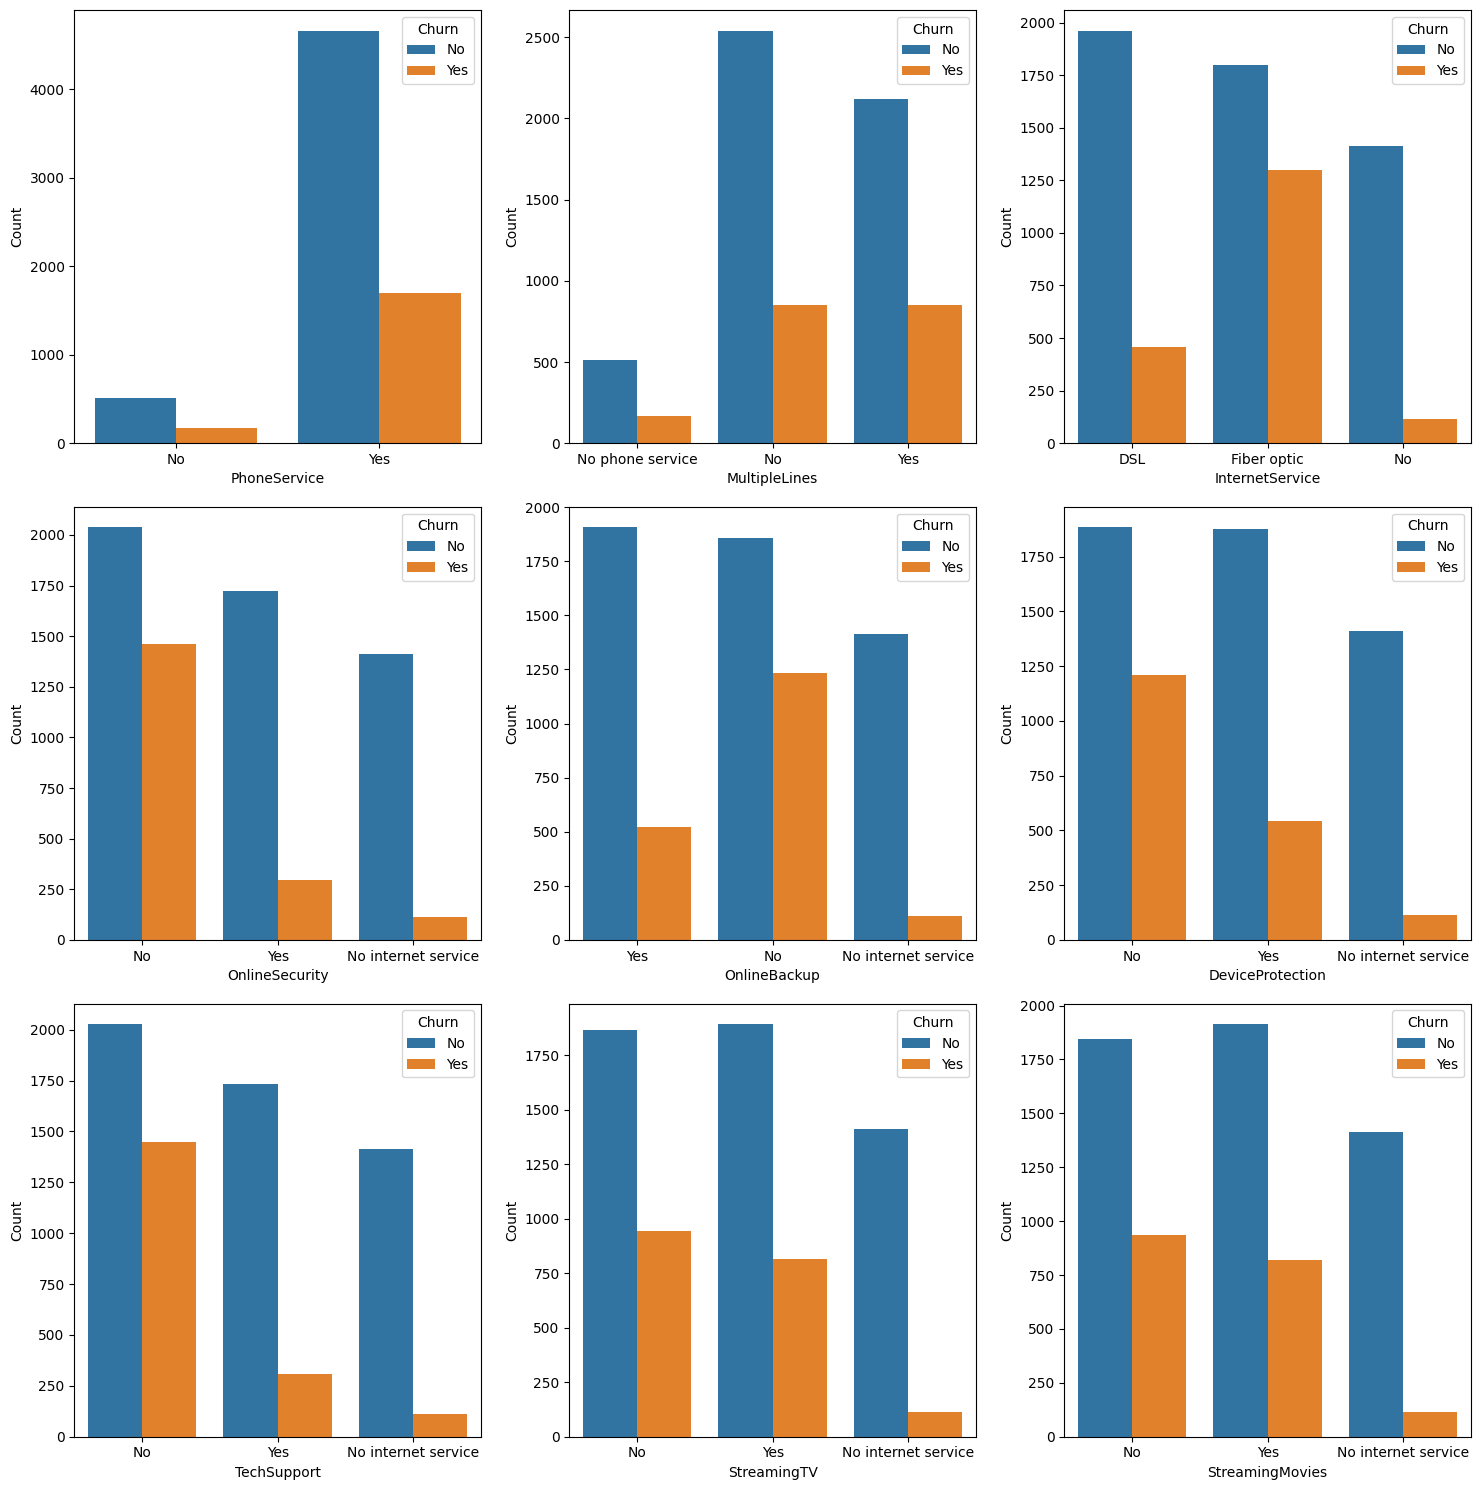

In [78]:
# List of columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Number of rows required
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each countplot
for idx, col in enumerate(columns):
    ax = axes[idx]
    sns.countplot(data=df, x=col, ax=ax, hue=df["Churn"])
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Hide any unused subplots
for ax in axes[len(columns):]:
    ax.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


# The majority of customers who do not churn tend to have services like PhoneService, InternetServices(particularly DSL)and OnlineSecurity enabled. For services like OnlineBackup, TechSupport and StramingTV, churn rates are noticeably higher when these services are not used or are unavilable.

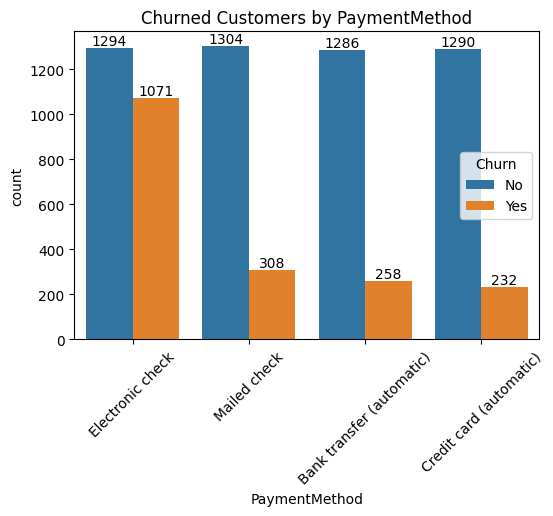

In [83]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod",data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

# Customer is likely to churn when hes is using electronic check as a payment method.